In [1]:
%%capture
cd ..

# Log your project

## File system logger



In [2]:
import os

from tempfile import gettempdir
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import make_classification
from palma import Project, ModelSelector, ModelEvaluation
from palma import components
from palma import set_logger, logger
from palma.datasets import load_credit_approval


set_logger(components.FileSystemLogger(f'{gettempdir()}/logger'))

X, y = load_credit_approval()
project = Project(problem="classification", project_name="test")
project.start(
    X, y,
    splitter=model_selection.ShuffleSplit(n_splits=10, random_state=42),
)
print(os.listdir(f'{logger.uri}/{project.project_name}/{project.study_name}'))


['project.pkl', 'project_properties.json']


C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



## mlflow logger

In [3]:
set_logger(components.MLFlowLogger('./.mlruns'))

In [4]:
X, y = load_credit_approval()

project = Project(problem="classification", project_name="test")
project.start(
    X, y,
    splitter=model_selection.ShuffleSplit(n_splits=10, random_state=42),
)

C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

Traceback (most recent call last):
  File "C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 329, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 427, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1373, in _read_yaml
    return _read_helper(root, file_name, attempts_remai

In [5]:
model = ModelSelector(engine="FlamlOptimizer",
                      engine_parameters=dict(time_budget=20))
model.start(project)

C:\Users\Vincent LAURENT\PROJETS\tools\palma_dev\.env\Lib\site-packages\flaml\automl\data.py:306: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



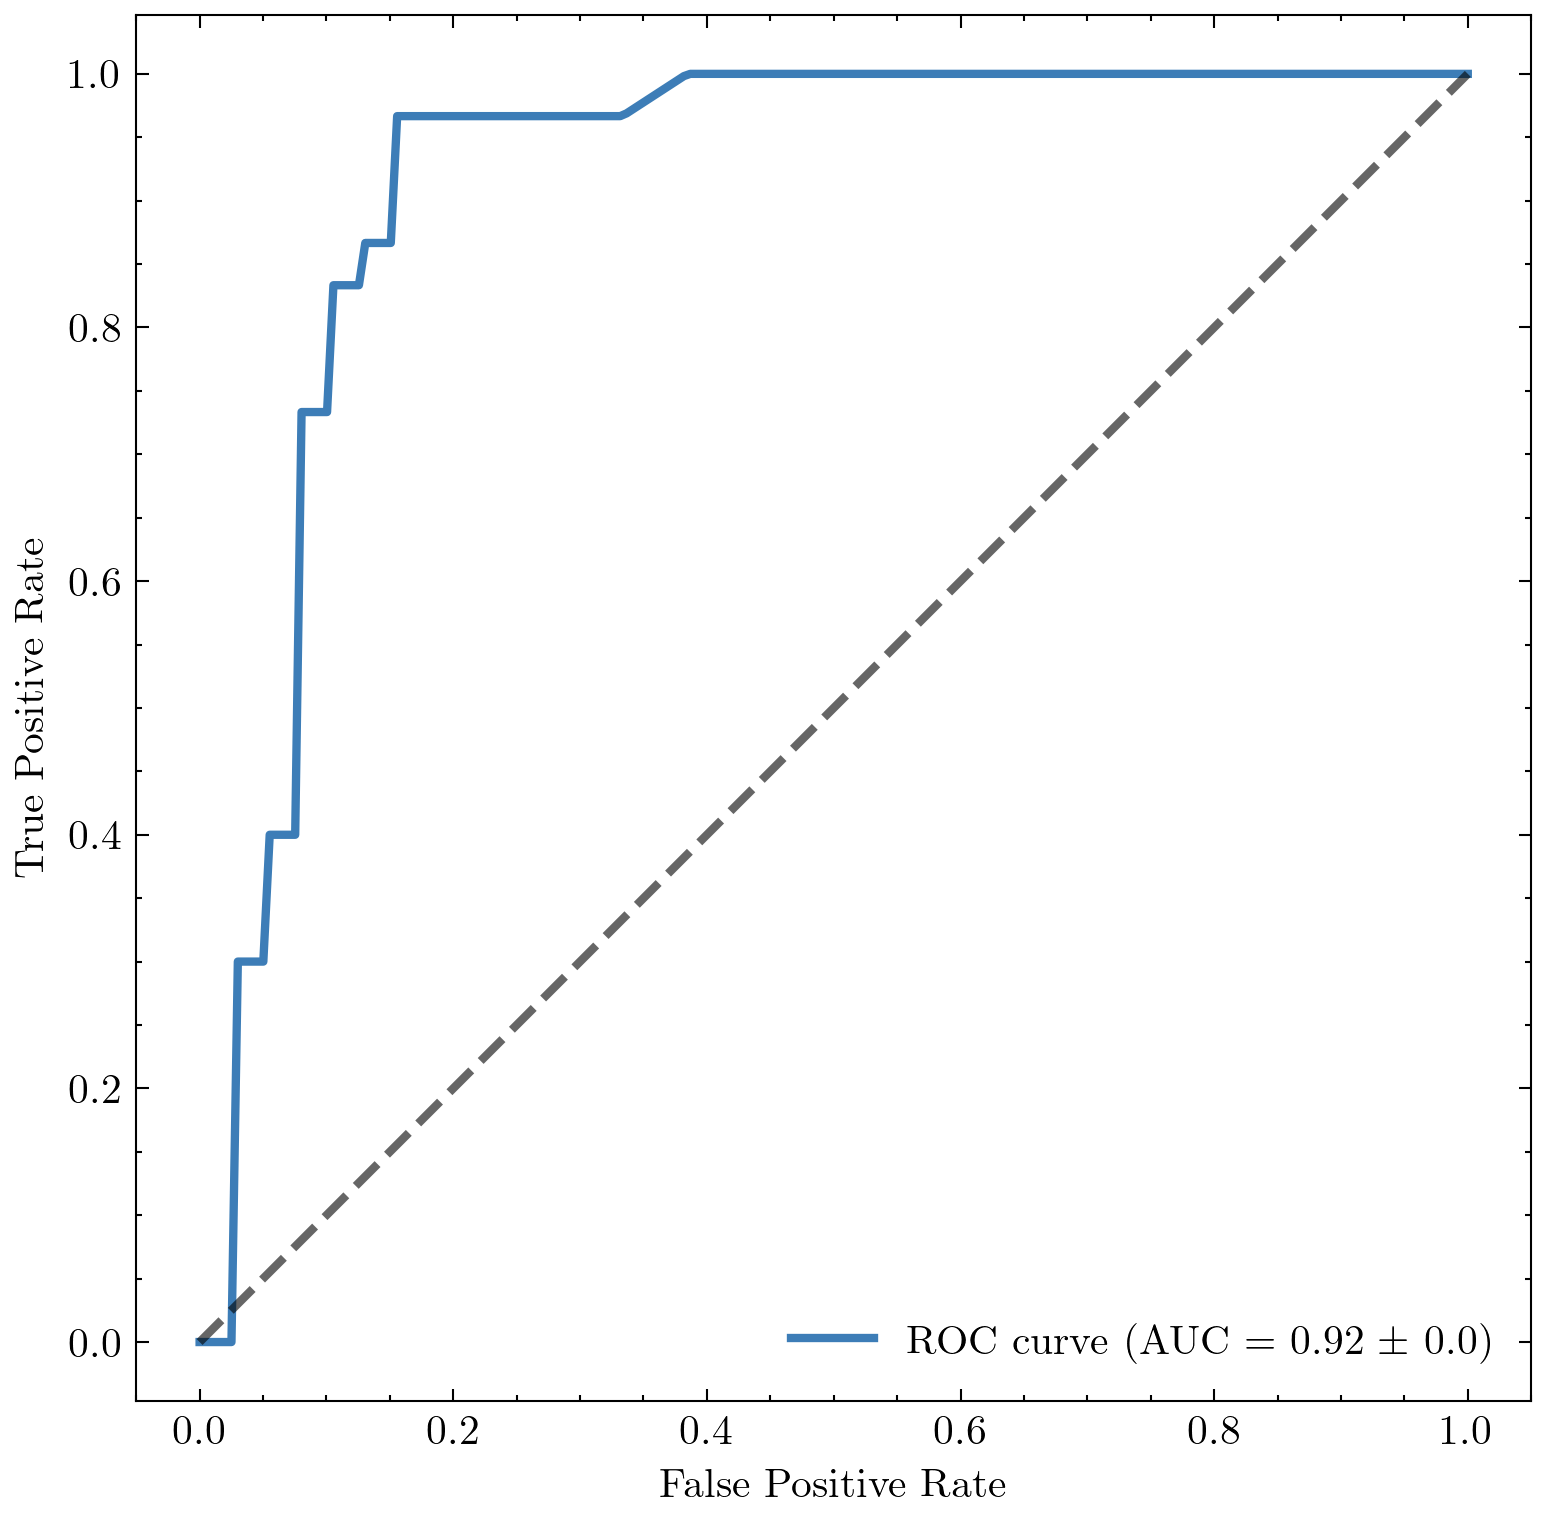

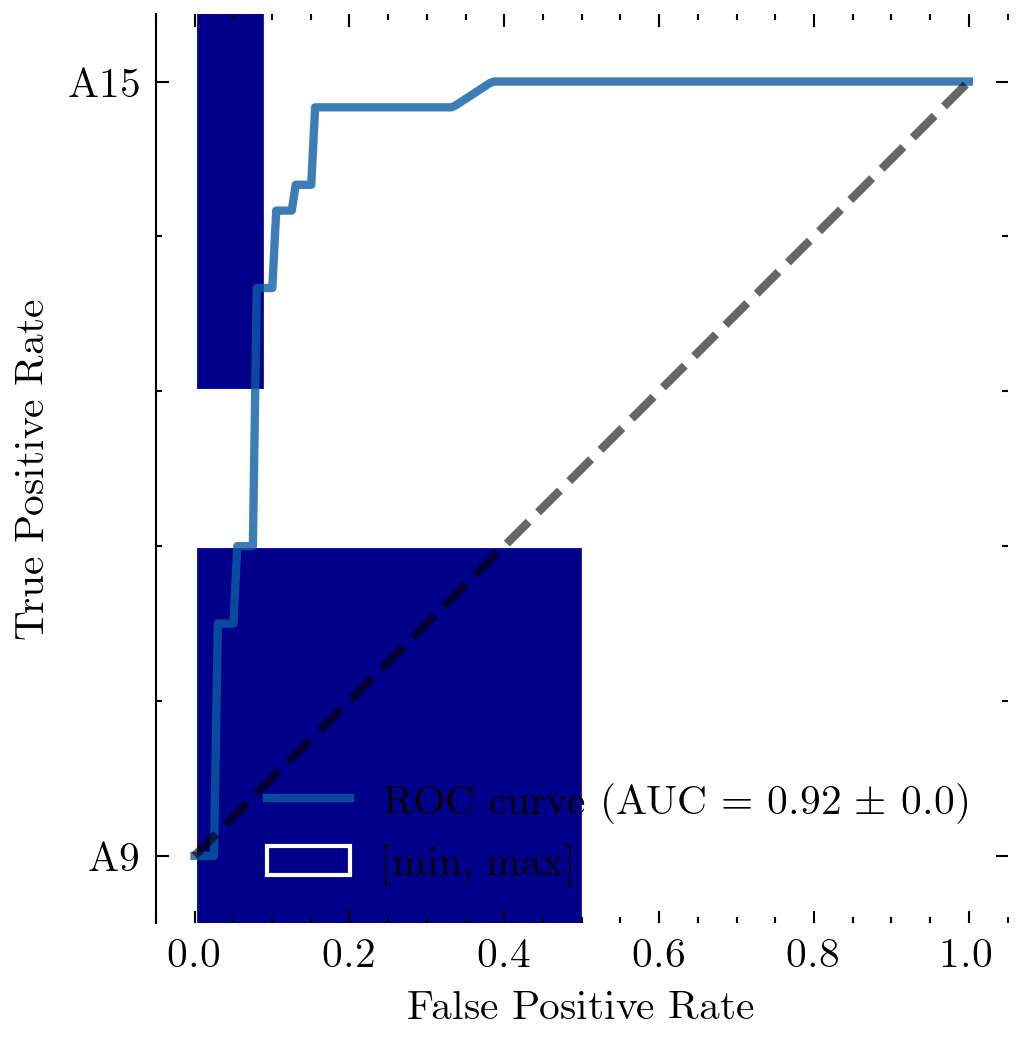

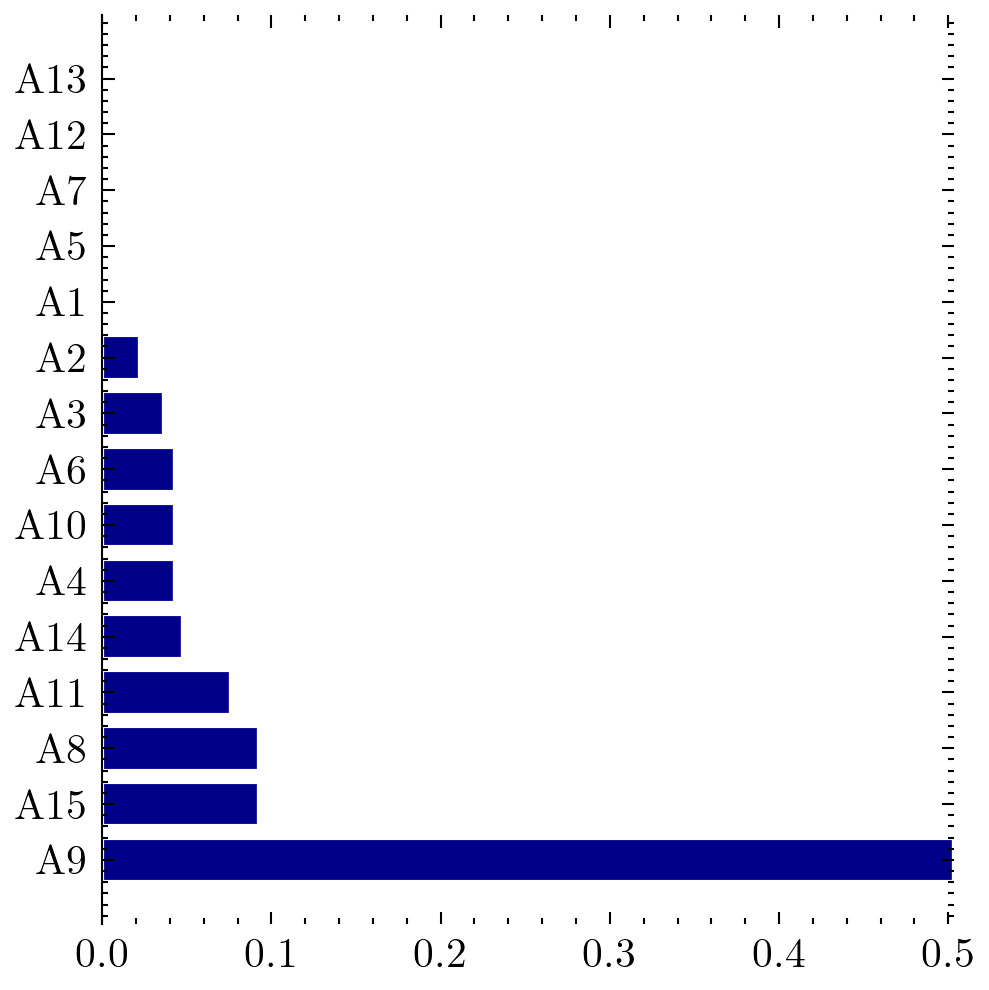

In [6]:
import matplotlib.pyplot as plt
evaluation = ModelEvaluation(model.best_model_)
evaluation.add(components.ScoringAnalysis(on="indexes_train_test"))
evaluation.fit(project)
evaluation.components["ScoringAnalysis"].plot_roc_curve()
plt.figure()
evaluation.components["ScoringAnalysis"].plot_variable_importance()